In [3]:
import requests
import pandas as pd

url = 'https://stats.nba.com/stats/leaguedashteamstats'

params =(
("Conference", ""),
("DateFrom", ""),
("DateTo", ""),
("Division", ""),
("GameScope", ""),
("GameSegment", ""),
("LastNGames", "0"),
("LeagueID", "00"),
("Location", ""),
("MeasureType", "Base"),
("Month", "0"),
("OpponentTeamID", "0"),
("Outcome", ""),
("PORound", "0"),
("PaceAdjust", "N"),
("PerMode", "PerGame"),
("Period", "0"),
("PlayerExperience", ""),
("PlayerPosition", ""),
("PlusMinus", "N"),
("Rank", "N"), 
("Season", "2020-21"),
("SeasonSegment", ""),
("SeasonType", "Regular Season"),
("ShotClockRange", ""),
("StarterBench", ""),    
("TeamID", "0"),   
("TwoWay", "0"),    
("VsConference", ""),
("VsDivision", "" ))

header = {
"accept": "application/json, text/plain, */*",
"accept-encoding": "gzip, deflate, br",
"accept-language": "en-US,en;q=0.9",
"connection": "keep-alive",
"host" : "stats.nba.com",
"If-Modified-Since": "Sat, 27 Nov 2021 23:37:38 GMT"  ,
"origin": "https://www.nba.com",
"referer": "https://www.nba.com/",
"sec-ch-ua-platform": "macOS" ,
"sec-fetch-dest": "empty",
"sec-fetch-mode": "cors",
"sec-fetch-site": "same-site",
"user-agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.55 Safari/537.36",
"x-nba-stats-origin": "stats",
"x-nba-stats-token": "true"}


response = requests.get(url, headers=header, params=params)
response_json = response.json()
NBA = pd.DataFrame(response_json['resultSets'][0]['rowSet'])
NBA.columns = response_json['resultSets'][0]['headers']
NBA.head()


,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,...,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,CFID,CFPARAMS
0,1610612737,Atlanta Hawks,72,41,31,0.569,48.3,40.8,87.2,0.468,...,9,24,17,17,18,9,13,9,10,Atlanta Hawks
1,1610612738,Boston Celtics,72,36,36,0.500,48.3,41.5,88.9,0.466,...,16,13,6,11,24,13,16,13,10,Boston Celtics
2,1610612751,Brooklyn Nets,72,48,24,0.667,48.3,43.1,87.3,0.494,...,13,27,7,9,13,18,2,7,10,Brooklyn Nets
3,1610612766,Charlotte Hornets,72,33,39,0.458,48.2,39.9,87.8,0.455,...,24,10,16,14,5,21,23,23,10,Charlotte Hornets
4,1610612741,Chicago Bulls,72,31,41,0.431,48.3,42.2,88.6,0.476,...,27,28,27,18,10,30,21,20,10,Chicago Bulls


In [4]:
for col in NBA.columns:
    print(col)

TEAM_ID
TEAM_NAME
GP
W
L
W_PCT
MIN
FGM
FGA
FG_PCT
FG3M
FG3A
FG3_PCT
FTM
FTA
FT_PCT
OREB
DREB
REB
AST
TOV
STL
BLK
BLKA
PF
PFD
PTS
PLUS_MINUS
GP_RANK
W_RANK
L_RANK
W_PCT_RANK
MIN_RANK
FGM_RANK
FGA_RANK
FG_PCT_RANK
FG3M_RANK
FG3A_RANK
FG3_PCT_RANK
FTM_RANK
FTA_RANK
FT_PCT_RANK
OREB_RANK
DREB_RANK
REB_RANK
AST_RANK
TOV_RANK
STL_RANK
BLK_RANK
BLKA_RANK
PF_RANK
PFD_RANK
PTS_RANK
PLUS_MINUS_RANK
CFID
CFPARAMS


In [5]:
NBA = NBA.drop(['CFPARAMS', 'CFID','TEAM_ID'], axis = 1)

In [6]:
NBA_num = NBA.drop(['GP','W','L','TEAM_NAME', 'GP_RANK','W_RANK','L_RANK','W_PCT_RANK','MIN_RANK','FGM_RANK',
'FGA_RANK','FG_PCT_RANK','FG3M_RANK','FG3A_RANK','FG3_PCT_RANK','FTM_RANK','FTA_RANK','FT_PCT_RANK','OREB_RANK',
'DREB_RANK','REB_RANK','AST_RANK','TOV_RANK','STL_RANK','BLK_RANK','BLKA_RANK','PF_RANK','PFD_RANK','PTS_RANK',
'PLUS_MINUS_RANK'], axis =1 )

In [7]:
NBA_num.head()

,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,...,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS
0,0.569,48.3,40.8,87.2,0.468,12.4,33.4,0.373,19.7,24.2,...,45.6,24.1,13.2,7.0,4.8,5.0,19.3,19.8,113.7,2.3
1,0.500,48.3,41.5,88.9,0.466,13.6,36.4,0.374,16.1,20.8,...,44.3,23.5,14.1,7.7,5.3,4.6,20.4,19.3,112.6,1.5
2,0.667,48.3,43.1,87.3,0.494,14.2,36.1,0.392,18.1,22.5,...,44.4,26.8,13.5,6.7,5.3,4.6,19.0,18.9,118.6,4.5
3,0.458,48.2,39.9,87.8,0.455,13.7,37.0,0.369,15.9,20.9,...,43.8,26.8,14.8,7.8,4.8,4.8,18.0,18.6,109.5,-1.9
4,0.431,48.3,42.2,88.6,0.476,12.6,34.0,0.370,13.8,17.5,...,45.0,26.8,15.1,6.7,4.2,5.1,18.9,17.7,110.7,-0.9


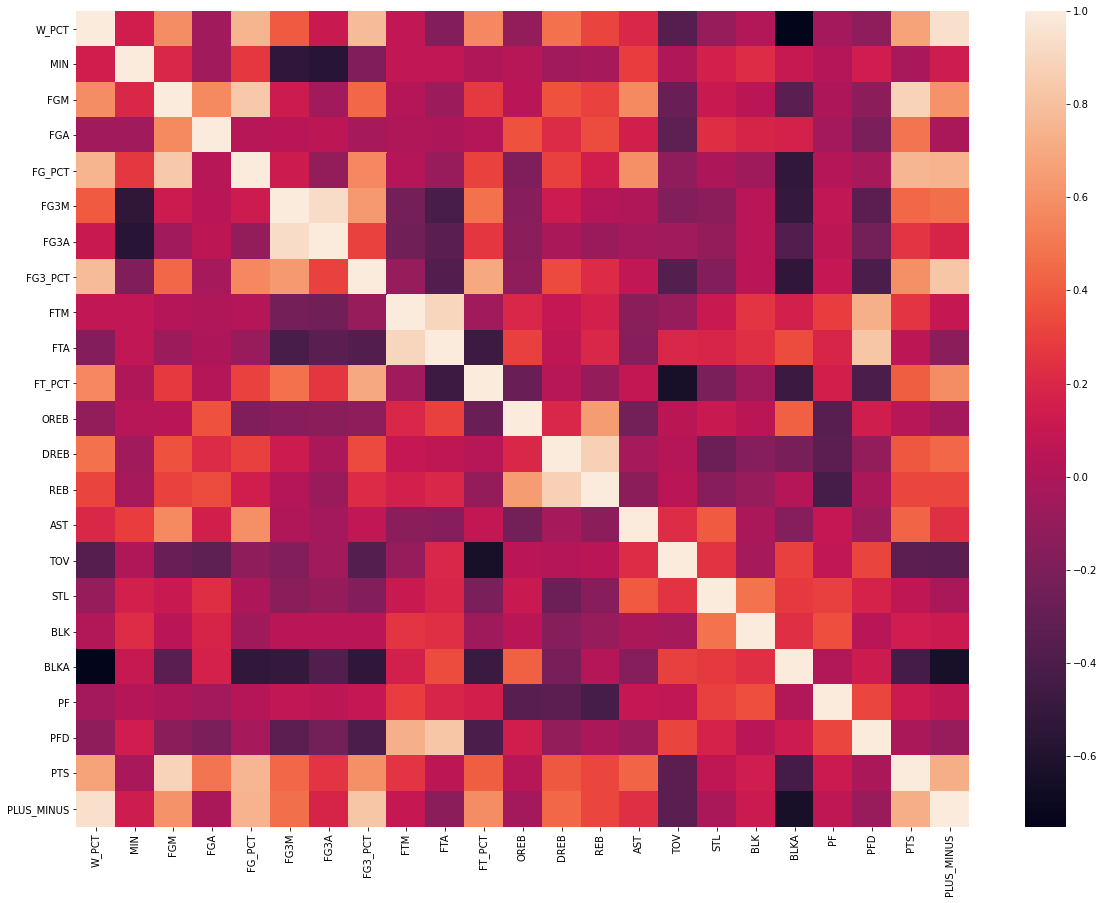

In [8]:
import seaborn as sbs
import matplotlib.pyplot as plt

plt.subplots(figsize=(20,15))
sbs.heatmap(NBA_num.corr());

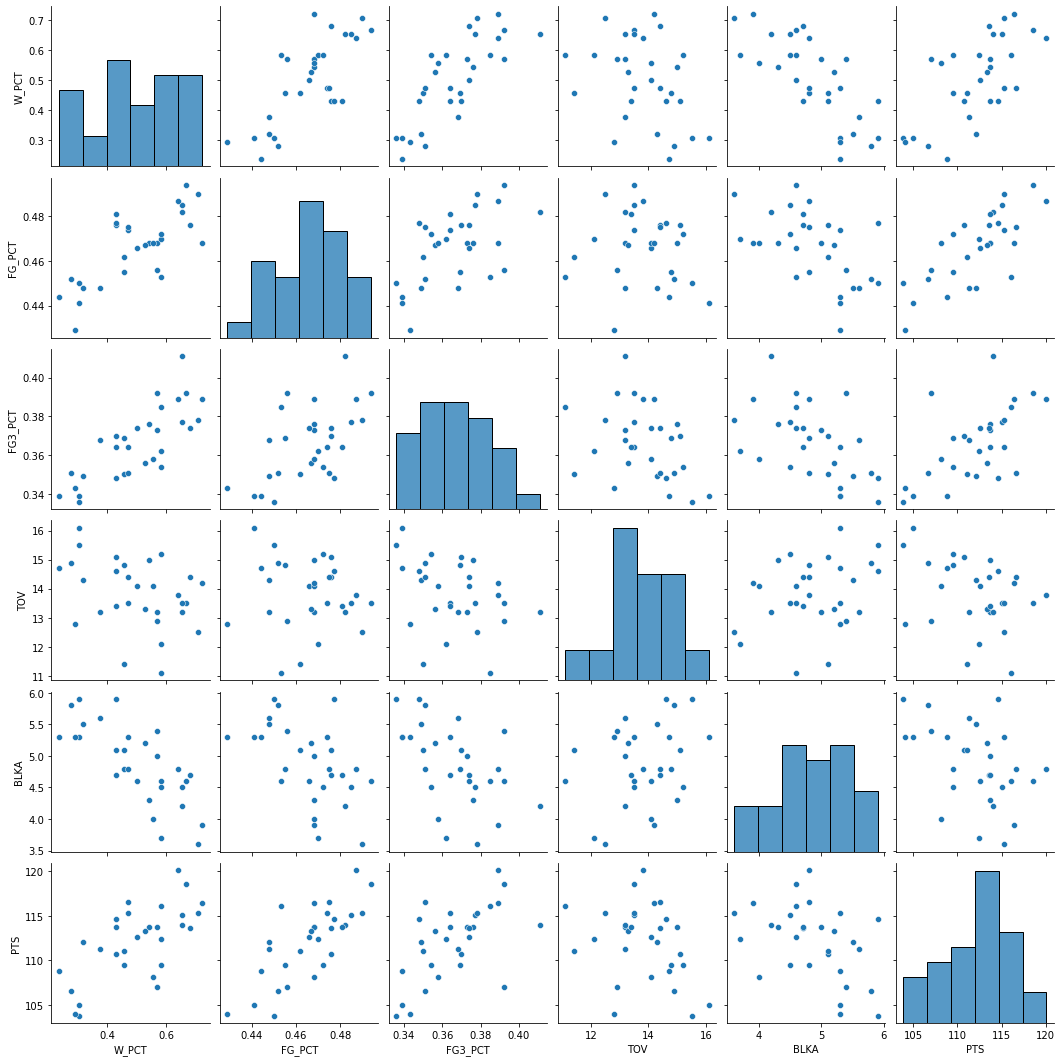

In [14]:
sbs.pairplot(NBA_num[['W_PCT', 'FG_PCT', 'FG3_PCT', 'TOV', 'BLKA', 'PTS']])

In [13]:
x = NBA.drop('W_PCT', axis = 1 )
y = NBA['W_PCT']